# Data Visualization

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['Target'] = data['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploratory Data Analysis (EDA)
### Heatmap

In [21]:
# Correlations (First 10 columns)
corrVar = df.iloc[:,:10].corr()

Text(0.5, 1.0, 'Heatmap: First 10 columns')

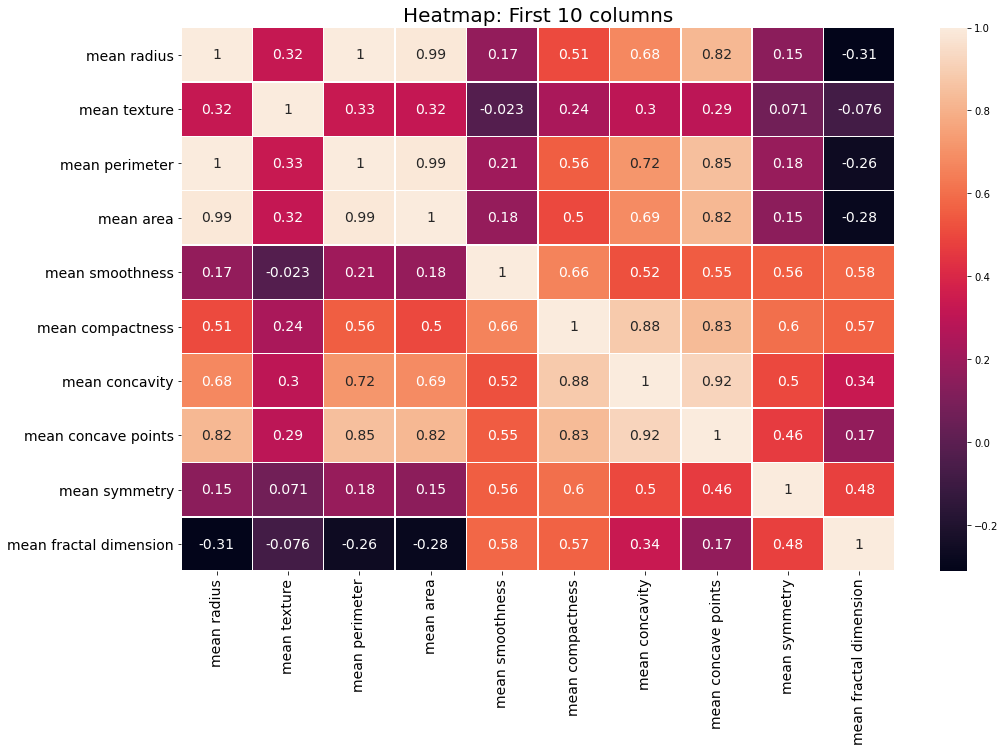

In [38]:
plt.figure(figsize = (16,10))
ax = sns.heatmap(corrVar, annot=True, linewidths=.5, annot_kws={"fontsize":14})
ax.tick_params(labelsize=14)
ax.axes.set_title('Heatmap: First 10 columns',fontsize=20)

### Boxplot & Histograms

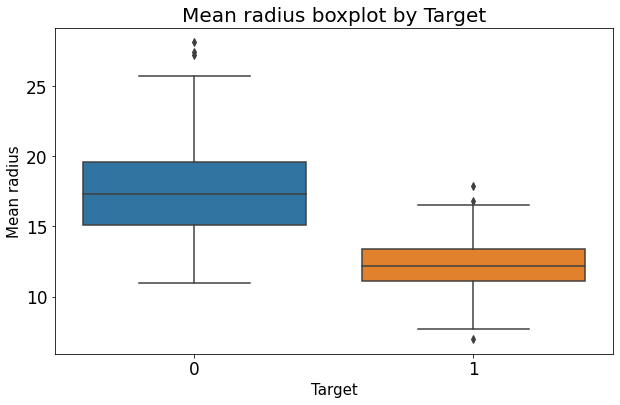

In [36]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(y = "mean radius", x = 'Target', data = df)
ax.axes.set_title('Mean radius boxplot by Target',fontsize=20)
ax.set_xlabel("Target",fontsize=15)
ax.set_ylabel("Mean radius",fontsize=15)
ax.tick_params(labelsize=17)

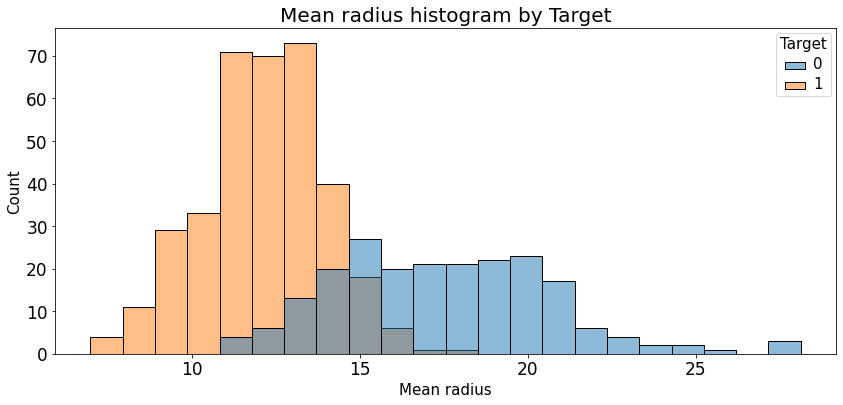

In [56]:
plt.figure(figsize = (14,6))
ax = sns.histplot(data=df, x= "mean radius", hue = 'Target')
ax.axes.set_title('Mean radius histogram by Target',fontsize=20)

ax.set_xlabel("Mean radius",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

ax.tick_params(labelsize=17)

### Scatterplot

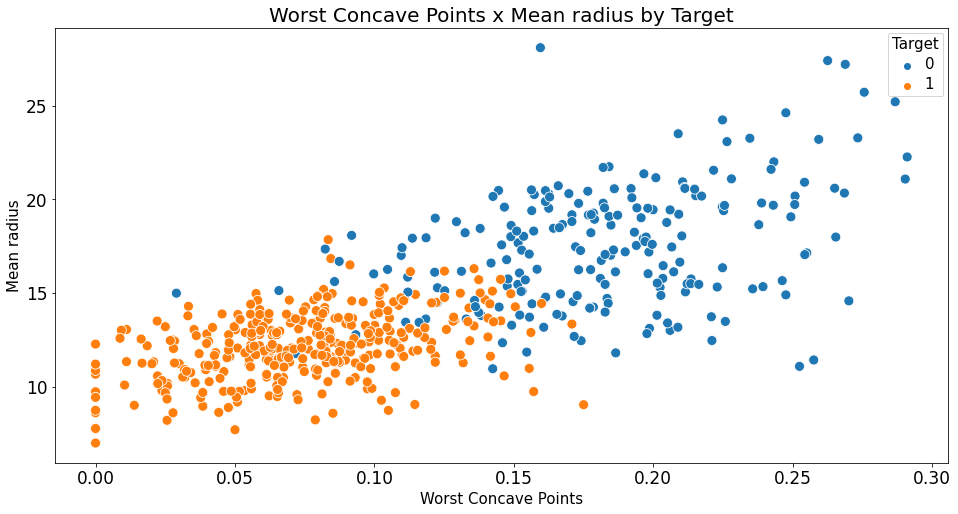

In [58]:
plt.figure(figsize = (16,8))
ax = sns.scatterplot(data=df, y="mean radius", x="worst concave points", hue = 'Target', s = 100)
ax.axes.set_title('Worst Concave Points x Mean radius by Target',fontsize=20)

ax.set_xlabel("Worst Concave Points",fontsize=15)
ax.set_ylabel("Mean radius",fontsize=15)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

ax.tick_params(labelsize=17)

## PairGrid - Multiple plots (Scatter & Histogram)

In [64]:
# First 5 columns + Target
df_5 = df.iloc[:,:5]
df_5['Target'] = df['Target']

<ipython-input-64-47e8092245d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['Target'] = df['Target']


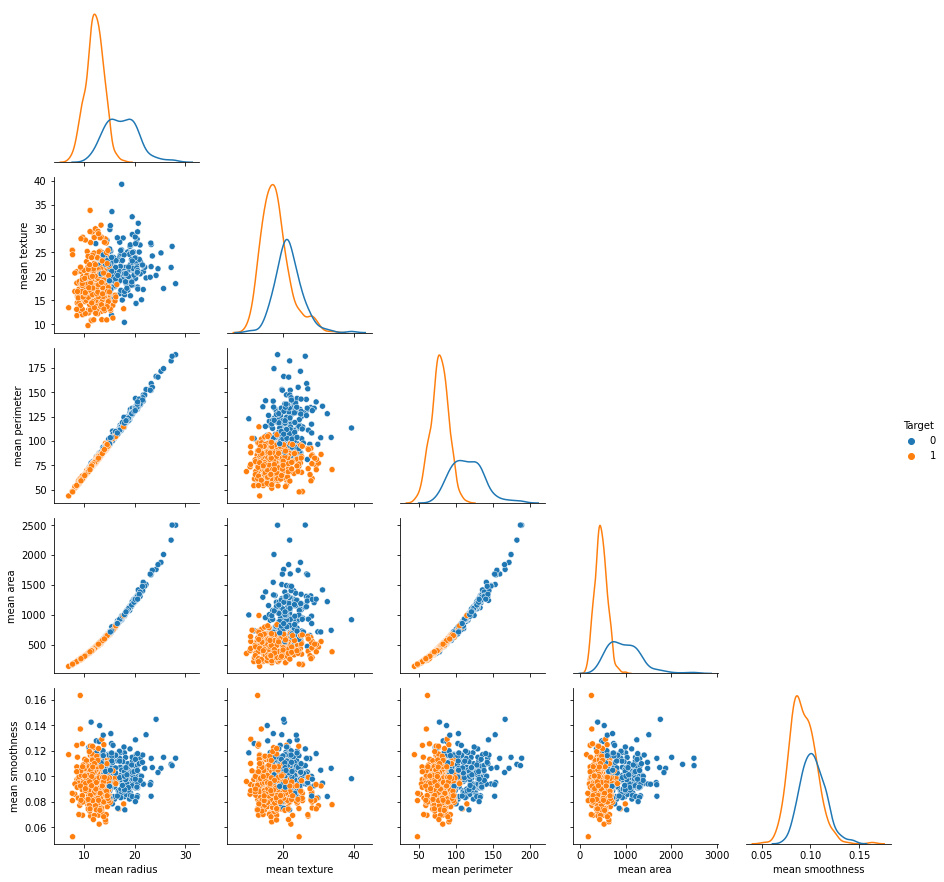

In [65]:
ax = sns.PairGrid(df_5, hue='Target',diag_sharey=False, corner=True, palette='tab10')
ax.map_lower(sns.scatterplot)
ax.map_diag(sns.kdeplot)
ax.add_legend()

## Visuals configuration

In [4]:
df_count = df[['Target','mean radius']].groupby('Target').count().reset_index().rename(columns = {'mean radius':'count'})

<AxesSubplot:xlabel='Target', ylabel='count'>

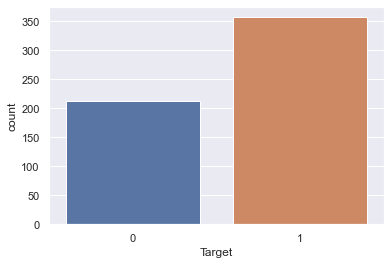

In [5]:
sns.barplot(x = 'Target', y = "count", data = df_count)

<AxesSubplot:xlabel='count', ylabel='Target'>

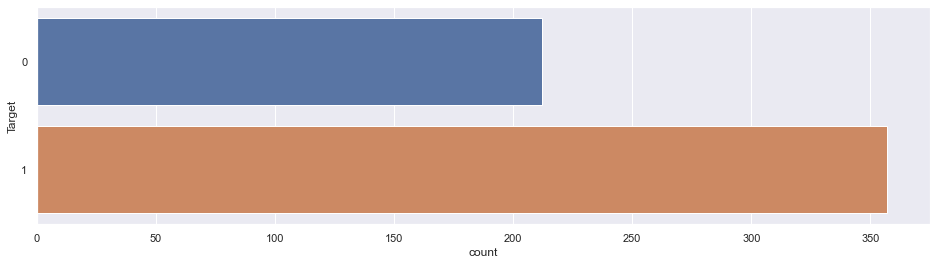

In [6]:
plt.figure(figsize = (16,4))
sns.barplot(y = 'Target', x = "count", data = df_count, orient = 'h')

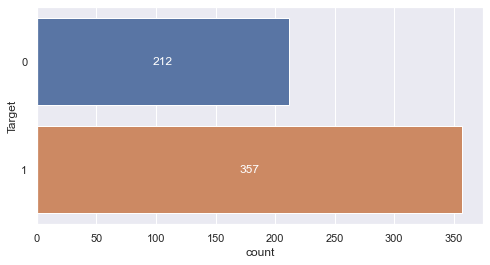

In [28]:
plt.figure(figsize = (8,4)) 
ax = sns.barplot(y = 'Target', x = "count", data = df_count, orient = 'h')

for container in ax.containers:
    ax.bar_label(container, label_type = 'center', color = 'white', fontsize = 12)

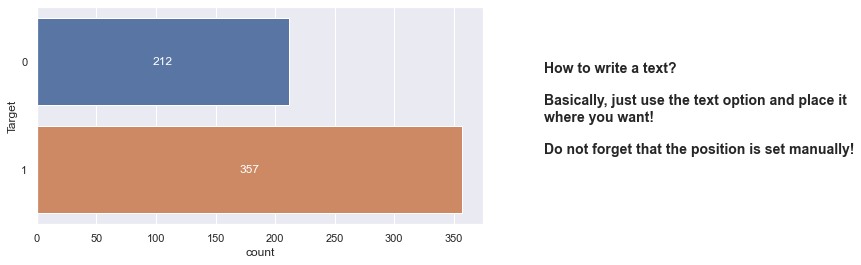

In [51]:
plt.figure(figsize = (8,4)) 
ax = sns.barplot(y = 'Target', x = "count", data = df_count, orient = 'h')

for container in ax.containers:
    ax.bar_label(container, label_type = 'center', color = 'white', fontsize = 12)
    
ax.text(x = 400,  
        y = 1,  
        s = '''
        How to write a text?
        
        Basically, just use the text option and place it 
        where you want!
        
        Do not forget that the position is set manually!
        ''',  
        fontsize = 14,
        weight='bold'
        )
plt.show()

In [135]:
def printLabels(ax, labels = None, pos = 'center'):
    for index in range(0, len(ax.containers[0])):
        x = ax.containers[0][index].xy[0]
        y = ax.containers[0][index].xy[1]
        width = ax.containers[0][index].get_width()
        height = ax.containers[0][index].get_height()
        y += height/2
        if pos == 'center':
            x += width/2
        else:
            x += width
        if labels != None:
            ax.text(x = x, y = y,  s = labels[index] + str(width),  fontsize = 12, color = 'white',
                    horizontalalignment = 'center', verticalalignment='center')
        else:
            ax.text(x = x, y = y,  s = width,  fontsize = 12,
                   horizontalalignment = 'center', verticalalignment='center')
    return

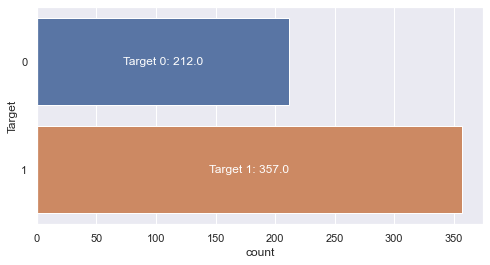

In [136]:
plt.figure(figsize = (8,4)) 
ax = sns.barplot(y = 'Target', x = "count", data = df_count, orient = 'h')

labels = ['Target 0: ', 'Target 1: ']

printLabels(ax, labels, pos = 'center')
    
plt.show()